In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

來源:https://scidm.nchc.org.tw/dataset/taiwan_air_quality_monitor_history  
國家實驗研究院 國家高速網路與計算中心 資料集平台

In [2]:
from datetime import datetime
def datelist(beginDate, endDate):
    # beginDate, endDate是形如‘20160601’的字符串或datetime格式
    date_l=[datetime.strftime(x,'%Y/%m/%d') for x in list(pd.date_range(start=beginDate, end=endDate))]
    return date_l

In [3]:
def filter(df,place,locat): 
    list_AIR=['AMB_TEMP','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10','PM2.5','RAINFALL','RH','SO2','THC','WD_HR','WIND_DIREC','WIND_SPEED','WS_HR']
    NEW_df=pd.DataFrame(columns=list_AIR,index=datelist('2016/01/01', '2016/12/31'))  #columns=df.iloc[0:17,2]
    NEW_df_month=pd.DataFrame(columns=['Station','month','season','locat'],index=datelist('2016/01/01', '2016/12/31'))
    NEW_df=pd.merge(NEW_df_month,NEW_df,left_index=True,right_index=True,how='outer')
    for i in range(len(df)):
        try:
            df_AIR=df.iloc[i,3:27].astype(np.float32)
            df_AIR_name=df.iloc[i,2]
            df_AIR_date=df.iloc[i,0]
            df_AIR_mean=df_AIR.mean()
            NEW_df.loc[df_AIR_date,df_AIR_name]=df_AIR_mean
            NEW_df.loc[df_AIR_date,'month']=int(df_AIR_date[5:7])
            NEW_df.loc[df_AIR_date,'Station']=place
            NEW_df.loc[df_AIR_date,'locat']=locat
            if NEW_df.loc[df_AIR_date,'month']>=11 or NEW_df.loc[df_AIR_date,'month']<=4:
                NEW_df.loc[df_AIR_date,'season']='winter'
            else:
                NEW_df.loc[df_AIR_date,'season']='summer'
        except:
            pass
    return NEW_df.loc[:,['Station','month','season','locat','AMB_TEMP','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10','PM2.5','RAINFALL','RH','SO2','THC','WD_HR','WIND_DIREC','WIND_SPEED','WS_HR']]

In [4]:
#用於locat
def pca_plot(df_NCS):
    X, y = df_NCS.iloc[:, 4:].values, df_NCS.iloc[:, 3].values
    print(X.shape, y.shape)
    
    #PCA
    pca = PCA(n_components=2)
    Xd = pca.fit_transform(X)
    np.set_printoptions(precision=3, suppress=True)
    print('第一个特征占 標準差,第二个特征占 標準差' )
    print(pca.explained_variance_ratio_)

    clf = DecisionTreeClassifier(random_state=14)
    scores = cross_val_score(clf, Xd, y, scoring='accuracy', cv=5)
    print(np.mean(scores))
    
    #plt
    classes = np.unique(y)
    colors = ['red', 'green']
    for cur_class, color in zip(classes, colors):
        mask = (y == cur_class)
        plt.scatter(Xd[mask, 0],
                    Xd[mask, 1],
                    marker='o',
                    color=color,
                    label=str(cur_class))
    return plt.legend()

In [5]:
#用於季節
def pca_plot_season(df_NCS):
    X, y = df_NCS.iloc[:, 4:].values, df_NCS.iloc[:, 2].values
    print(X.shape, y.shape)
    
    #PCA
    pca = PCA(n_components=2)
    Xd = pca.fit_transform(X)
    np.set_printoptions(precision=3, suppress=True)
    print('第一个特征占 標準差,第二个特征占 標準差' )
    print(pca.explained_variance_ratio_)

    clf = DecisionTreeClassifier(random_state=14)
    scores = cross_val_score(clf, Xd, y, scoring='accuracy', cv=5)
    print(np.mean(scores))
    
    #plt
    classes = np.unique(y)
    colors = ['red', 'green']
    for cur_class, color in zip(classes, colors):
        mask = (y == cur_class)
        plt.scatter(Xd[mask, 0],
                    Xd[mask, 1],
                    marker='o',
                    color=color,
                    label=str(cur_class))
    return plt.legend()

In [6]:
pd.read_csv('105年板橋站_20170217.csv').head(10)

,日期,測站,測項,00,01,02,03,04,05,06,...,14,15,16,17,18,19,20,21,22,23
0,2016/01/01,板橋,AMB_TEMP,17,17,17,17,17,17,17,...,22,22,22,21,21,21,21,21,20,18
1,2016/01/01,板橋,CH4,2,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,2,2,2,2,2,2
2,2016/01/01,板橋,CO,0.56,0.53,0.46,0.42,0.37,0.37,0.43,...,0.43,0.45,0.49,0.61,0.72,0.72,0.78,0.93,0.91,0.64
3,2016/01/01,板橋,NMHC,0.15,0.13,0.11,0.1,0.09,0.08,0.11,...,0.11,0.13,0.14,0.19,0.23,0.24,0.24,0.3,0.35,0.23
4,2016/01/01,板橋,NO,1.7,1.8,1.8,1.5,1.2,1.5,1.7,...,3.7,3.3,3.2,2.4,3.9,3.6,5.1,9.1,7.1,7
5,2016/01/01,板橋,NO2,14,12,11,9.5,8.3,9.3,16,...,14,17,21,26,33,33,36,42,35,23
6,2016/01/01,板橋,NOx,16,14,13,11,9.5,11,17,...,18,20,24,29,37,36,41,51,42,30
7,2016/01/01,板橋,O3,43,44,43,43,42,40,33,...,39,35,30,24,17,18,14,7.4,6.3,5.1
8,2016/01/01,板橋,PH_RAIN,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
9,2016/01/01,板橋,PM10,99,87,77,70,66,60,65,...,66,60,61,58,55,57,59,58,52,48


In [7]:
df=pd.read_csv('105年板橋站_20170217.csv')
df_Banqiao=filter(df,'Banqiao','north')
df_Banqiao=df_Banqiao.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Banqiao=df_Banqiao.dropna(axis=0,how='any')
df_Banqiao.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Banqiao,1,winter,north,1.92917,0.5375,0.155,3.55,19.2125,22.7292,30.825,62.0417
2016/01/02,Banqiao,1,winter,north,2.10833,1.05833,0.42,18.3583,31.4167,49.75,11.4458,92.75
2016/01/03,Banqiao,1,winter,north,2.22083,1.08833,0.458333,26.3292,38.7083,65.0417,3.725,63.4583
2016/01/04,Banqiao,1,winter,north,2.17917,1.18167,0.644167,30.8167,35.5833,66.5,3.17917,48.5
2016/01/05,Banqiao,1,winter,north,2.1875,1.235,0.65875,35.2292,32.25,67.5417,5.875,48.5833


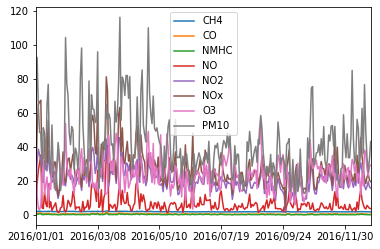

In [8]:
df_Banqiao[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

In [9]:
df=pd.read_csv('105年中山站_20170217.csv')
df_Zhongshan=filter(df,'Zhongshan','north')
df_Zhongshan=df_Zhongshan.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Zhongshan=df_Zhongshan.dropna(axis=0,how='any')
df_Zhongshan.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Zhongshan,1,winter,north,1.89583,0.612083,0.160417,7.22083,24.1625,31.4583,24.8167,64.8333
2016/01/02,Zhongshan,1,winter,north,2.03333,0.992917,0.31625,23.0958,31.5833,54.4583,6.37083,67.8333
2016/01/03,Zhongshan,1,winter,north,2.075,0.9525,0.31375,25.2792,33.9583,59.25,4.32083,48.25
2016/01/05,Zhongshan,1,winter,north,2.05833,1.20875,0.46625,49.4792,28.9167,78.3333,5.11667,41.1667
2016/01/06,Zhongshan,1,winter,north,1.87083,0.74,0.235417,15.9583,26.9167,42.825,15.6417,19.0833


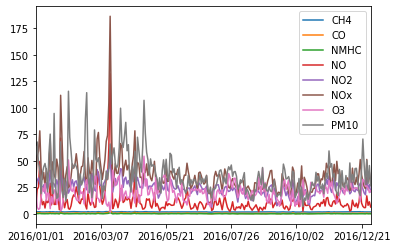

In [10]:
df_Zhongshan[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

In [11]:
df=pd.read_csv('105年西屯站_20170217.csv')
df_Xitun=filter(df,'Xitun','Central')
df_Xitun=df_Xitun.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Xitun=df_Xitun.dropna(axis=0,how='any')
df_Xitun.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Xitun,1,winter,Central,1.8125,0.41875,0.132083,4.12083,16.5833,20.5417,33.1667,65.6667
2016/01/02,Xitun,1,winter,Central,1.80417,0.443333,0.149167,3.10833,19.3208,22.425,21.5083,70.7917
2016/01/03,Xitun,1,winter,Central,1.80417,0.45375,0.157917,4.35833,19.1667,23.45,17.95,20.7083
2016/01/04,Xitun,1,winter,Central,1.8875,0.935417,0.625833,36.3208,28.4167,64.8333,10.0708,50.9583
2016/01/05,Xitun,1,winter,Central,1.89583,0.894583,0.6275,36.4833,25.875,62.5417,12.6417,69.5833


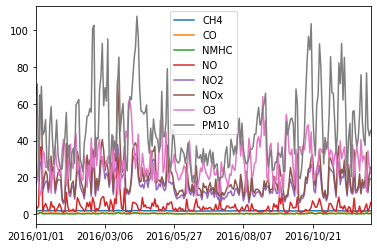

In [12]:
df_Xitun[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

In [13]:
df=pd.read_csv('105年彰化站_20170217.csv')
df_Changhua=filter(df,'Changhua','Central')
df_Changhua=df_Changhua.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Changhua=df_Changhua.dropna(axis=0,how='any')
df_Changhua.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Changhua,1,winter,Central,1.88333,0.586667,0.179167,3.47083,17.9292,21.4042,28.2542,61.5
2016/01/02,Changhua,1,winter,Central,1.85833,0.554167,0.151667,2.11667,17.2042,19.3167,22.0417,72.7083
2016/01/03,Changhua,1,winter,Central,1.90417,0.590833,0.226667,8.06667,20.65,28.5958,11.55,28.6667
2016/01/04,Changhua,1,winter,Central,1.94583,0.885,0.433333,23.6417,26.8333,50.5833,8.27083,51.5833
2016/01/05,Changhua,1,winter,Central,1.99167,0.864167,0.451667,26.6042,22.9583,49.5417,6.625,78.4167


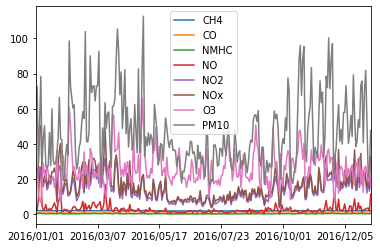

In [14]:
df_Changhua[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

In [15]:
df=pd.read_csv('105年仁武站_20170217.csv')
df_Renwu=filter(df,'Renwu','south')
df_Renwu=df_Renwu.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Renwu=df_Renwu.dropna(axis=0,how='any')
df_Renwu.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Renwu,1,winter,south,2.1125,0.690833,0.2825,6.0625,28.75,34.875,26.3125,146.083
2016/01/02,Renwu,1,winter,south,2.06667,0.663333,0.249583,6.66667,25.2917,32.0417,13.225,125.667
2016/01/03,Renwu,1,winter,south,2.05,0.510417,0.225417,9.3375,19.5833,28.875,5.47917,37.2083
2016/01/04,Renwu,1,winter,south,2.15833,0.810417,0.452917,17.9625,30.0833,47.9167,9.89583,80.5652
2016/01/05,Renwu,1,winter,south,2.15417,0.762083,0.395417,11.9375,26.75,38.5833,18.0917,104.667


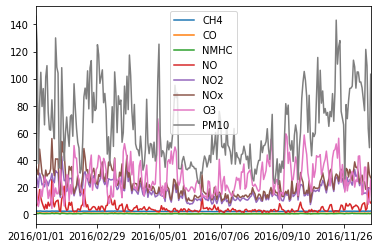

In [16]:
df_Renwu[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

In [17]:
df=pd.read_csv('105年臺南站_20170217.csv')
df_Tainan=filter(df,'Tainan','south')
df_Tainan=df_Tainan.loc[:,['Station','month','season','locat','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']]
df_Tainan=df_Tainan.dropna(axis=0,how='any')
df_Tainan.head()

,Station,month,season,locat,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
2016/01/01,Tainan,1,winter,south,2.00833,0.714167,0.21375,2.87917,22.125,25.0833,33.3542,99.1667
2016/01/02,Tainan,1,winter,south,1.97917,0.658333,0.192083,2.33333,21.625,24.0417,18.3083,87.7917
2016/01/03,Tainan,1,winter,south,1.9875,0.58375,0.175,4.41667,23.875,28.25,7.95833,36.7917
2016/01/05,Tainan,1,winter,south,2.10417,0.833333,0.439583,12.1333,27.0417,39.3333,16.8083,83.0833
2016/01/06,Tainan,1,winter,south,2.02917,0.585417,0.272917,7.41667,18.7542,26.2083,17.9125,61.9167


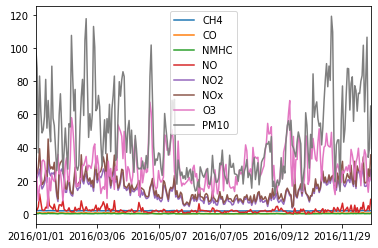

In [18]:
df_Tainan[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].plot()

曲線圖可以看出可以分出2個季節  
5月到10個和11月到下年4月

# 先看看北中南的差別

## 北部和中部

(1045, 8) (1045,)
第一个特征占 標準差,第二个特征占 標準差
[0.541 0.372]
0.7004784688995216


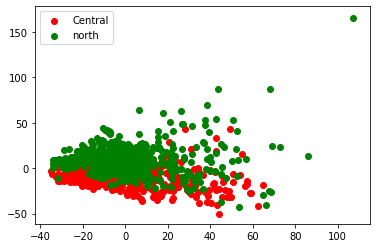

In [19]:
test_NC=pd.concat([df_Banqiao,df_Zhongshan,df_Xitun,df_Changhua])
pca_plot(test_NC)

## 中部和南部

(1062, 8) (1062,)
第一个特征占 標準差,第二个特征占 標準差
[0.774 0.169]
0.5084728496766764


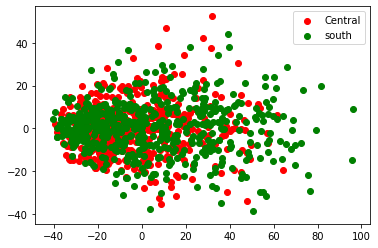

In [20]:
test_CS=pd.concat([df_Xitun,df_Changhua,df_Renwu,df_Tainan])
pca_plot(test_CS)

## 北部和南部

(1077, 8) (1077,)
第一个特征占 標準差,第二个特征占 標準差
[0.631 0.287]
0.730826873385013


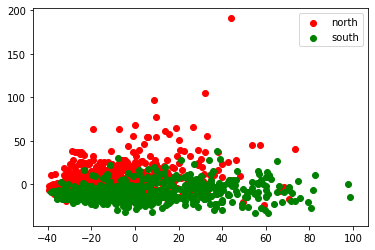

In [21]:
test_NS=pd.concat([df_Banqiao,df_Zhongshan,df_Renwu,df_Tainan])
pca_plot(test_NS)

可以看出來中南部全年的空氣品質可以看作一個整體來看  
北部和中南部的空氣品質是有較為明顯的差異  

# 不同季節的差異(冬季和夏季)

## 北部和中部 (冬季)

(524, 8) (524,)
第一个特征占 標準差,第二个特征占 標準差
[0.496 0.43 ]
0.6222161172161171


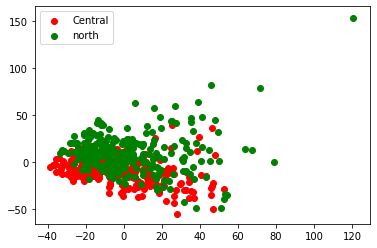

In [22]:
test_W_NC=pd.concat([df_Banqiao,df_Zhongshan,df_Xitun,df_Changhua])
test_W_NC=test_W_NC[test_W_NC.season=='winter']
pca_plot(test_W_NC)

## 中部和南部 (冬季)

(541, 8) (541,)
第一个特征占 標準差,第二个特征占 標準差
[0.749 0.198]
0.5359836901121304


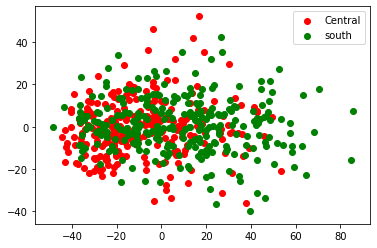

In [23]:
test_W_CS=pd.concat([df_Xitun,df_Changhua,df_Renwu,df_Tainan])
test_W_CS=test_W_CS[test_W_CS.season=='winter']
pca_plot(test_W_CS)

## 北部和南部 (冬季)

(545, 8) (545,)
第一个特征占 標準差,第二个特征占 標準差
[0.614 0.316]
0.651650758348006


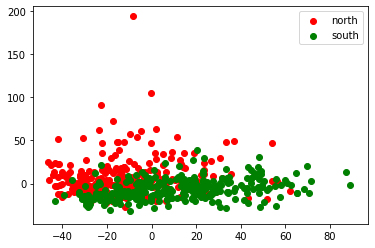

In [24]:
test_W_NS=pd.concat([df_Banqiao,df_Zhongshan,df_Renwu,df_Tainan])
test_W_NS=test_W_NS[test_W_NS.season=='winter']
pca_plot(test_W_NS)

## 北部和中部 (夏季)

(521, 8) (521,)
第一个特征占 標準差,第二个特征占 標準差
[0.571 0.326]
0.7813369963369963


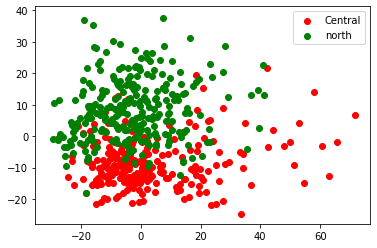

In [25]:
test_S_NC=pd.concat([df_Banqiao,df_Zhongshan,df_Xitun,df_Changhua])
test_S_NC=test_S_NC[test_S_NC.season=='summer']
pca_plot(test_S_NC)

## 中部和南部 (夏季)

(521, 8) (521,)
第一个特征占 標準差,第二个特征占 標準差
[0.784 0.159]
0.49895604395604387


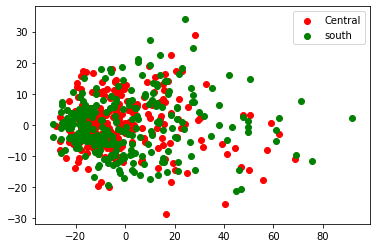

In [26]:
test_S_CS=pd.concat([df_Xitun,df_Changhua,df_Renwu,df_Tainan])
test_S_CS=test_S_CS[test_S_CS.season=='summer']
pca_plot(test_S_CS)

## 北部和南部 (夏季)

(532, 8) (532,)
第一个特征占 標準差,第二个特征占 標準差
[0.629 0.262]
0.795422781271838


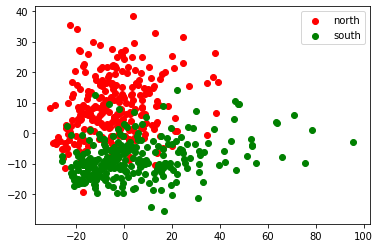

In [27]:
test_S_NS=pd.concat([df_Banqiao,df_Zhongshan,df_Renwu,df_Tainan])
test_S_NS=test_S_NS[test_S_NS.season=='summer']
pca_plot(test_S_NS)

不同季節的差異上:  
夏天的時候 北部和中南部差異明顯   
冬天的時候 北部和中南部差異較為不明顯 但也看得出區別  

我看到北部冬天的資料比較分散  
所以把北部的空污數據分12個月 看看結果

## 北部 分12個月

In [28]:
test_N_M=pd.concat([df_Banqiao,df_Zhongshan])
X, y = test_N_M.iloc[:, 4:].values, test_N_M.iloc[:, 1].values
print(X.shape, y.shape)
pca = PCA(n_components=2)
Xd = pca.fit_transform(X,y)
type(Xd)
test_N_M['pca1'] = Xd[:,0]
test_N_M['pca2'] = Xd[:,1]

(530, 8) (530,)


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


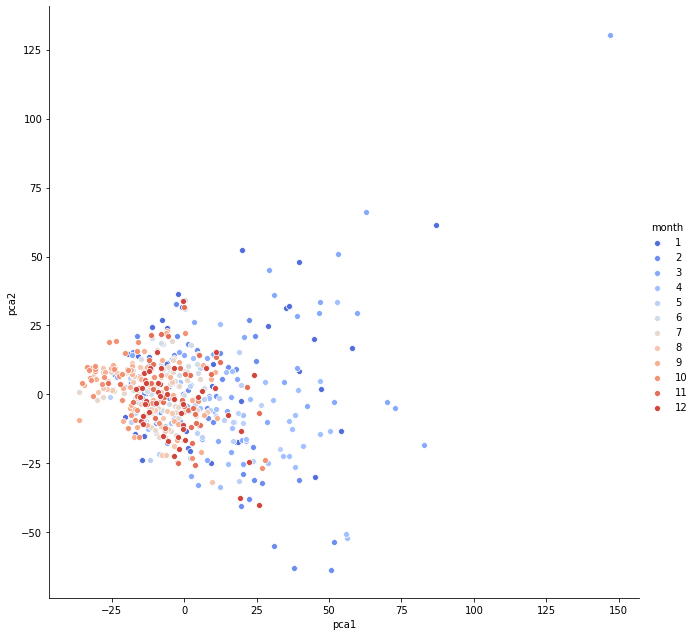

In [29]:
import seaborn as sns
sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=test_N_M, hue="month", size=9,palette='coolwarm')
print('')

# 結合折線圖 台灣冬季空污較嚴重 特別是南部
# 結合折線圖和PCA散佈圖 有時候北部冬季會受境外污染影響
<img src="01.png" width="50%">
<img src="04.png" width="50%">

# 小結:
# 北部冬季空污多是外來的 
# 南部冬季空污除了外來也可能是境內污染

# 南北部PM10的箱形圖

北部1年pm10盒鬚圖


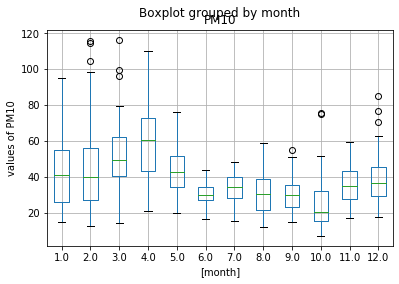

In [30]:
box_N=pd.concat([df_Banqiao,df_Zhongshan])
box_N=box_N[['month','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float)
fig,axes = plt.subplots()
box_N.boxplot(column='PM10',by=['month'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('values of PM10')
#plt.savefig('p3.png')   # 將繪製的圖形儲存為p3.png
print('北部1年pm10盒鬚圖')

南部1年pm10盒鬚圖


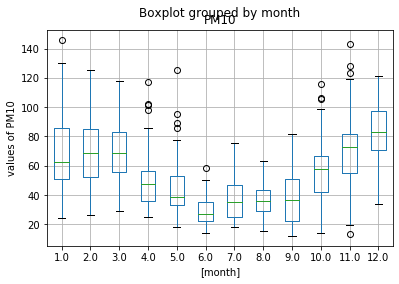

In [31]:
box_S=pd.concat([df_Renwu,df_Tainan])
box_S=box_S[['month','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float)
fig,axes = plt.subplots()
box_S.boxplot(column='PM10',by=['month'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('values of PM10')
#plt.savefig('p3.png')   # 將繪製的圖形儲存為p3.png
print('南部1年pm10盒鬚圖')

可以看出在冬天南部的pm10帶來的污染比北部來的嚴重

北部1年NOx盒鬚圖


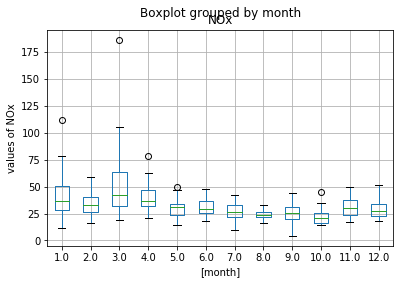

In [32]:
box_N=pd.concat([df_Banqiao,df_Zhongshan])
box_N=box_N[['month','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float)
fig,axes = plt.subplots()
box_N.boxplot(column='NOx',by=['month'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('values of NOx')
#plt.savefig('p3.png')   # 將繪製的圖形儲存為p3.png
print('北部1年NOx盒鬚圖')

南部1年NOx盒鬚圖


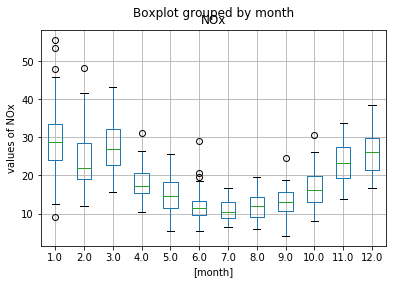

In [33]:
box_S=pd.concat([df_Renwu,df_Tainan])
box_S=box_S[['month','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float)
fig,axes = plt.subplots()
box_S.boxplot(column='NOx',by=['month'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('values of NOx')
#plt.savefig('p3.png')   # 將繪製的圖形儲存為p3.png
print('南部1年NOx盒鬚圖')

可以看出北部1年中NOx(氮氧化物)都是比南部高的  
南部夏天的時候NOx(氮氧化物)很低

# 描述性統計

In [34]:
result_Zhongshan=df_Zhongshan[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float).describe()
print('中山站')
pd.DataFrame(result_Zhongshan)  #50百分位 #平衡值

中山站


,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,1.907703,0.666867,0.210373,11.930782,24.399709,36.317232,20.808075,36.838017
std,0.112209,0.281390,0.123849,11.591466,7.101623,16.778441,8.322731,17.900488
min,1.700000,0.172917,0.018333,2.383333,6.554167,9.812500,1.462500,6.916667
25%,1.837500,0.502708,0.143854,6.550001,20.620834,26.802083,15.279166,23.833333
50%,1.891667,0.608958,0.183125,9.364583,24.229167,33.250000,20.802083,33.458332
75%,1.950000,0.771042,0.251250,13.433333,27.954167,40.657292,25.157291,44.020834
max,2.700000,3.153333,1.339583,132.250000,54.083332,186.375000,54.433334,115.666664


In [35]:
result_Renwu=df_Renwu[['CH4','CO','NMHC','NO','NO2','NOx','O3','PM10']].astype(float).describe()
print('仁武站')
pd.DataFrame(result_Renwu)

仁武站


,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,1.944002,0.429534,0.182749,4.282006,17.713797,21.993590,26.804045,64.592179
std,0.108929,0.152947,0.087143,3.340633,6.735064,9.071448,11.993836,26.966751
min,1.704167,0.141667,0.018333,0.712500,5.850000,8.125000,3.950000,21.833334
25%,1.854166,0.304583,0.116667,2.283333,12.262500,14.883334,17.608334,42.791668
50%,1.962500,0.426250,0.165000,3.170833,16.633333,19.791666,24.395834,58.791668
75%,2.029167,0.538333,0.242500,5.483334,22.625000,28.166666,35.720833,84.333336
max,2.175000,0.880417,0.540833,25.783333,42.500000,55.708332,70.333336,146.083328


# 結論

## 描述性統計可以看出
北部的污染以氮氧化物為主
南部的污染以PM10為主

氮氧化物(NOx)。燃燒過程可說是產生的最主要來源，而燃燒過程則來自於移動污染源 ( 如汽機車 ) 及固定污染源 ( 如發電廠、煉鋼廠等工業爐 )。氮氧化物生成的來源並不像CO、SOx或碳氫化合物等完全來自於燃料，在高溫時NOx之形成有極大部分來自於空氣中的氮氣及氧氣之反應。

懸浮微粒（PM10）是指顆粒直徑在10微米（μm）以下的空氣中粒狀物，來源主要是石化燃料及工業排放、移動源廢氣等氣體燃燒污染。  
未鋪瀝青、水泥的路面上行使的機動車、材料的破碎碾磨處理過程以及被風揚起的塵土

# 在夏天的時候  
南部和北部的污染PM10的數值都很低  
南部的氮氧化物的數值會比北部更低
#### 所以台灣夏天的時候空氣都不錯 南部空氣會比北部來得更好


# 在冬天的時候
南北部空氣都不太好  
特別是南部的PM10平衡要比北部來得高